<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/Fake_News_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Article Detector**

The advent of the World Wide Web and the rapid adoption of social media platforms (such as Facebook and Twitter) paved the way for information dissemination that has never been witnessed in the human history before. With the current usage of social media platforms, consumers are creating and sharing more information than ever before, some of which are misleading with no relevance to reality.

The following program help in identifying such news articles programatically if a news article is Fake or Not.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Data Pre Processing](#2)
  3. [Exploring Data Analysis](#3)
  4. [Natural Language Processing](#4)
  5. [Training and Validation](#5)
  6. [Summary](#6)
  7. [Future Work](#7)
  8. [References](#8)

# <font color="darkslateblue" size=+2.0><b>1: AboutDataset</b></font> <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Each sample in the train and test set has the following information:

- The title of the new article.
- The text of the new article againt each title.
- The subject for the news article.
- Date of the new article


I am predicting whether a given news is about a real news or not. If so, predict a 1. If not, predict a 0.

# <font color="darkslateblue" size=+2.0><b>2: Data Pre Processing</b></font> <a name="2"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Importing all the required libraries

In [1]:
#Fundamental pre processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lib for NLP processing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Downloading the dataset from Kaggle

In [2]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


  0%|          | 0.00/41.0M [00:00<?, ?B/s]

100%|██████████| 41.0M/41.0M [00:00<00:00, 59.9MB/s]


Accessing few sample records

In [3]:
real_news = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
fake_news = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
real_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# <font color="darkslateblue" size=+2.0><b>3: Exploratory Data Analysis</b></font> <a name="3"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

So now we will go trough an exploratory data analysis to get insights from the news article. The aim here is to divide this session into topics so we can explore graphics for each subject.

## <font color="dimgrey" size=+2.0><b>3.1: Labels distribution</b></font>

Size of dataset downloaded

In [5]:
print(real_news.shape)
print(fake_news.shape)

(21417, 4)
(23481, 4)


We add a column each in both the dataset to identify the real and fake new articles. We denote real news as 1 and fake with 0

In [6]:
real_news['FakeOrNot'] = 1
fake_news['FakeOrNot'] = 0

Now we combine both the indiviual dataset so that we can analyse the complete dataset

In [7]:
News_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
News_Dataset.head()

,title,text,subject,date,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


As we are running the analysis with the news titles hence the remaining columns are not required.

In [8]:
News_Dataset = News_Dataset.drop(['text', 'subject', 'date'], axis = 1)
News_Dataset

,title,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [9]:
News_Dataset.FakeOrNot.value_counts()

0    23481
1    21417
Name: FakeOrNot, dtype: int64

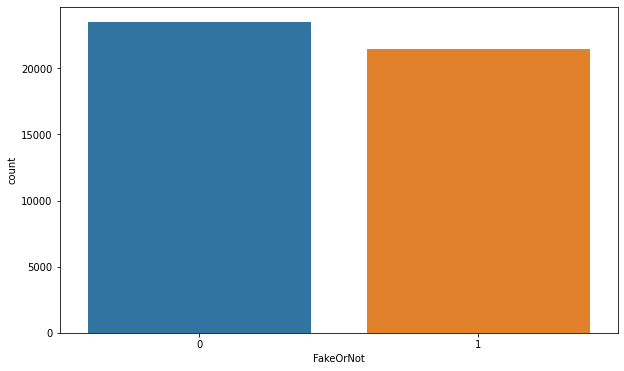

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = News_Dataset, x='FakeOrNot')
plt.show()

The labels seems to be evenly distributed. This is a good sign and confirms that the dataset is not biased.

# <font color="darkslateblue" size=+2.0><b>4: Natural Language Processing </b></font> <a name="4"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## <font color="dimgrey" size=+2.0><b>4.1: Cleaning, Formatting and Lemmitization</b></font>

Before processing the text let us check if any row/columns are having null values

In [11]:
News_Dataset[News_Dataset.isnull().any(axis=1)]

,title,FakeOrNot


Let are now remove all the string punctuation(like !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~), We can achieve this by simple keeping the work from [a-z] and [A-Z] and replacing the rest of the words with space.

Also, let us lower all the text so when stemming/lemmatization is applied words spell in capitals are not treated differently with the same words present in small letters.

We apply stopwords to safely ignore the meaningless words without sacrificing the meaning of the sentences

In the end we implement Lemmatization for converting a word to its base form.

In [12]:
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0, len(News_Dataset)):
    review = re.sub('[^a-zA-Z]', ' ', News_Dataset['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## <font color="dimgrey" size=+2.0><b>4.2: Applying Bag Of Words</b></font>

In [13]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()

# <font color="darkslateblue" size=+2.0><b>5: Train and Validation (Bag of words and TF - IDF)</b></font> <a name="5"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

## <font color="dimgrey" size=+2.0><b>5.1: Train Test Split</b></font>

We split the data into training and validation set

In [14]:
X.shape

(44898, 5000)

In [15]:
y=News_Dataset['FakeOrNot']

In [16]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [17]:
cv.get_feature_names()[:20]

['abc news',
 'abe say',
 'abortion law',
 'abortion right',
 'abortion video',
 'absolutely destroys',
 'accept election',
 'access pipeline',
 'accuses obama',
 'accuses trump',
 'across america',
 'act terror',
 'acting like',
 'action gun',
 'action north',
 'active shooter',
 'actor george',
 'actor james',
 'ad campaign',
 'ad video']

In [18]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abc news,abe say,abortion law,abortion right,abortion video,absolutely destroys,accept election,access pipeline,accuses obama,accuses trump,across america,act terror,acting like,action gun,action north,active shooter,actor george,actor james,ad campaign,ad video,adam schiff,administration video,admits obama,admits trump,adviser flynn,adviser say,afghan capital,africa anc,africa ramaphosa,africa zuma,african american,african refugee,african republic,ag jeff,ag loretta,ag session,agent say,agrees trump,ahead election,ahead new,...,wow new,wow obama,wow trump,wow video,wow watch,writer say,wrong video,xi say,xi tell,year ago,year end,year jail,year later,year old,year prison,year video,yemen blockade,yemen houthis,yemen port,yemen saleh,yet another,yet video,york attorney,york city,york governor,york time,young boy,young girl,young man,young voter,young woman,yr old,zika funding,zika virus,zimbabwe army,zimbabwe military,zimbabwe mnangagwa,zimbabwe mugabe,zimbabwe opposition,zimbabwe ruling
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## <font color="dimgrey" size=+2.0><b>5.2: Applying ML Models using SKlearn (Bag of words)</b></font>

Multinomial models are more suited for processing text related features extracted using Bag of words

In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [20]:
from sklearn import metrics
import numpy as np
import itertools

In [21]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.809


## <font color="dimgrey" size=+2.0><b>5.3: Evalutating Results(Bag of Words)</b></font>

We write the below functions to build the confusion matrix visualizations.

Confusion matrix, without normalization


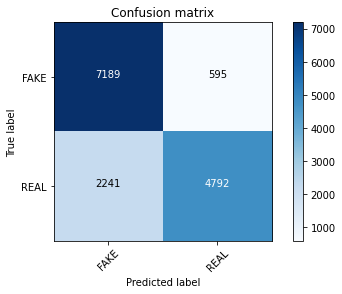

In [22]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [23]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8085982317608152

In [24]:
y_train.shape

(30081,)

## <font color="dimgrey" size=+2.0><b>5.4: Implementing hyper parameterization(Bag of Words)</b></font>

Multinomial Classifier with Hyperparameter

In [25]:

classifier=MultinomialNB(alpha=0.1)


previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8108928932982385
Alpha: 0.1, Score : 0.8112303435243302
Alpha: 0.2, Score : 0.8106904231625836
Alpha: 0.30000000000000004, Score : 0.8098130525747452
Alpha: 0.4, Score : 0.8096105824390902
Alpha: 0.5, Score : 0.8094081123034352
Alpha: 0.6000000000000001, Score : 0.8096105824390902
Alpha: 0.7000000000000001, Score : 0.8094081123034352
Alpha: 0.8, Score : 0.8087332118512519
Alpha: 0.9, Score : 0.8087332118512519


In [26]:
## Get Features names
feature_names = cv.get_feature_names()

In [27]:
classifier.coef_[0]

array([-8.42544953, -8.26888046, -8.0143506 , ..., -7.20968214,
       -8.83942532, -8.13353912])

In [28]:

### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9183220627642816, 'white house'),
 (-4.012343113112831, 'north korea'),
 (-4.675347422929109, 'trump say'),
 (-5.002457483900236, 'islamic state'),
 (-5.089016679105087, 'supreme court'),
 (-5.3890308597294965, 'puerto rico'),
 (-5.519197004037397, 'south korea'),
 (-5.586271948941922, 'travel ban'),
 (-5.6164553267650215, 'trump administration'),
 (-5.647578170685604, 'say trump'),
 (-5.668878230481693, 'factbox trump'),
 (-5.770776262828325, 'russia probe'),
 (-5.794902885442462, 'new york'),
 (-5.794902885442462, 'house speaker'),
 (-5.832220648449657, 'pm may'),
 (-5.832220648449657, 'foreign minister'),
 (-5.897689048347329, 'nuclear deal'),
 (-5.939131442763404, 'tax bill'),
 (-5.939131442763404, 'north korean'),
 (-5.997202909167303, 'trump twitter')]

In [29]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.305762391959313, 'abortion video'),
 (-10.305762391959313, 'absolutely destroys'),
 (-10.305762391959313, 'accuses obama'),
 (-10.305762391959313, 'across america'),
 (-10.305762391959313, 'acting like'),
 (-10.305762391959313, 'active shooter'),
 (-10.305762391959313, 'actor george'),
 (-10.305762391959313, 'actor james'),
 (-10.305762391959313, 'ad video'),
 (-10.305762391959313, 'administration video'),
 (-10.305762391959313, 'admits obama'),
 (-10.305762391959313, 'admits trump'),
 (-10.305762391959313, 'african refugee'),
 (-10.305762391959313, 'ag jeff'),
 (-10.305762391959313, 'ag loretta'),
 (-10.305762391959313, 'ag session'),
 (-10.305762391959313, 'agent say'),
 (-10.305762391959313, 'al sharpton'),
 (-10.305762391959313, 'alan dershowitz'),
 (-10.305762391959313, 'alex jones')]

## <font color="dimgrey" size=+2.0><b>5.5: Implementing TF-IDF</b></font>

Implementing TFIDF in the corpus extracted eariler

In [30]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [31]:
X.shape

(44898, 17622)

Prefroming the train test split

In [32]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [33]:
cv.get_feature_names()[:20]

['aa',
 'aar',
 'aardvark',
 'aaron',
 'aarp',
 'abadi',
 'abandon',
 'abandoned',
 'abandoning',
 'abbas',
 'abbott',
 'abc',
 'abdeslam',
 'abdicate',
 'abdication',
 'abdo',
 'abduct',
 'abducted',
 'abduction',
 'abdul']

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

count_df.head()

,aa,aar,aardvark,aaron,aarp,abadi,abandon,abandoned,abandoning,abbas,abbott,abc,abdeslam,abdicate,abdication,abdo,abduct,abducted,abduction,abdul,abdullah,abe,abed,abedin,abercrombie,aberdeen,abertis,abetted,abhorrent,abide,abiding,ability,abject,able,abnormality,aboard,abolish,abolished,abolishes,abolition,...,zarif,zarrab,zbc,zbigniew,zealand,zealot,zeid,zeldin,zellweger,zelnicek,zephyr,zero,zhong,zika,zilch,zimbabwe,zimbabwean,zimmerman,zing,zinger,zinke,zionist,ziraat,zit,zoellick,zohra,zombie,zombiehillary,zone,zoning,zoo,zoolander,zor,zschaepe,zucker,zuckerberg,zulia,zuma,zummar,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <font color="dimgrey" size=+2.0><b>5.6: Applying ML Models using SKlearn & Evaluating Results (TF IDF)</b></font>

accuracy:   0.933
Confusion matrix, without normalization


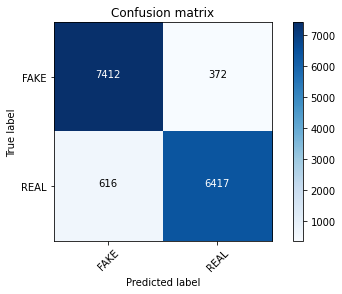

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## <font color="dimgrey" size=+2.0><b>5.7: Implementing hyper parameterization(Tf IDF)</b></font>

Multinomial Classifier with Hyperparameter

In [36]:
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9128028615779172
Alpha: 0.1, Score : 0.932577444826888
Alpha: 0.2, Score : 0.935007086454748
Alpha: 0.30000000000000004, Score : 0.9353445366808396
Alpha: 0.4, Score : 0.9353445366808396
Alpha: 0.5, Score : 0.9349395964095296
Alpha: 0.6000000000000001, Score : 0.9344671660930013
Alpha: 0.7000000000000001, Score : 0.934602146183438
Alpha: 0.8, Score : 0.933792265640818
Alpha: 0.9, Score : 0.9332523452790713


With TF IDF we are able to achieve an accuracy on 93 %..Great!!!

# <font color="darkslateblue" size=+2.0><b>6: Summary </b></font> <a name="6"></a>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

- We downloaded the Fake News Dataset from Kaggle.
- We performed the NLP preprocess and EDA to understand the labels distribution.
- We trained the model using both Bag of words and TF IDF.
- Implemented hyperparameters to achieve maximum accuracy.
- We analysed the accuracy, For TFIDF we achieved the accuracy of **93%** and for Bag of words it is **80%** and conclued TF IDF have performed better than bag of words.

# <font color="darkslateblue" size=+2.0><b>7: Future Work </b></font> <a name="7"></a>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Although we got started with the notebook there are many possiblities to futher build on our analysis.

- Try implemneting Word2Vec to further improve the accuracy.
- Implement techniques like LSTM and evalute the results.
- Build a neural network and check the performance

# <font color="darkslateblue" size=+2.0><b>10: References </b></font> <a name="10"></a>

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

- https://www.youtube.com/watch?v=MO5n5JaRotc&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=13&ab_channel=KrishNaikKrishNaikVerified

- https://www.youtube.com/watch?v=E9gVleivB6M&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=14&ab_channel=KrishNaikKrishNaikVerified

- https://github.com/krishnaik06/Fake-News-Classifier/blob/master/FakeNewsClassifier%20TFIDF.ipynb

- https://github.com/krishnaik06/Fake-News-Classifier/blob/master/FakeNewsCount_vectorizer.ipynb
